## Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\7th sem project\Machine learning part\dataset\test",
    labels = "inferred", # it is like tags for each value(a,b,c 12,23) based on folder names
    label_mode = "categorical", #vector representation
    class_names = None, 
    color_mode = "grayscale", # means the images are in black and white
    batch_size = 32, #process 32 image at one time 
    image_size = (24, 24), # image pixel size is 24*24
    shuffle = True, #mixes image everytime when it trains
    seed = 42, # helps in randomization
    interpolation = "bilinear", # resizing 
    crop_to_aspect_ratio = False, #whether to crop the image or not 
)

Found 682 files belonging to 62 classes.


# Test set image processing

Loading trained model

In [2]:
learn = tf.keras.models.load_model("1st Iteration.keras")

In [3]:
# Recompiling the model
learn.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics =['accuracy']
)

## Image test visualization

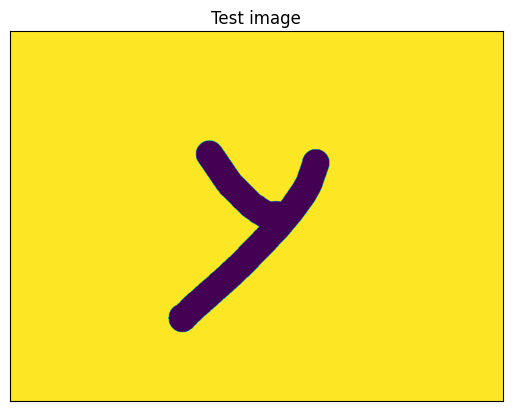

In [41]:
import cv2
image_path = r"D:\7th sem project\Machine learning part\dataset\test\Y_caps\Y_caps.048.png"

# reading the image in default mode
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#displaying the image
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing the image

In [42]:
image = tf.keras.preprocessing.image.load_img(image_path, color_mode='grayscale', target_size=(24, 24))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #converting image into single batch
predictions = learn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [43]:
print(predictions)

[[7.54819547e-13 6.81068049e-11 6.12979278e-10 1.70228471e-08
  1.80693803e-07 3.21370916e-11 2.36363655e-15 6.31507191e-07
  5.96928240e-09 4.78590634e-09 6.50956199e-12 2.17914532e-12
  2.60707522e-20 3.67192839e-11 4.19641001e-15 8.86184192e-13
  2.52219010e-15 1.45265153e-06 1.23560467e-10 5.61112223e-08
  2.29889163e-10 9.25723867e-14 5.69052094e-09 1.60585202e-07
  2.70683222e-16 6.25325625e-10 2.13212233e-13 1.90809044e-12
  5.02834129e-11 1.28496476e-11 1.02028087e-10 1.19171607e-04
  1.10688037e-08 2.00751922e-04 5.89058578e-01 3.54956148e-10
  1.12340935e-11 1.51779119e-07 4.44015915e-16 2.78750978e-08
  2.64454248e-16 1.16953969e-09 1.04797732e-06 1.96982250e-10
  6.63294831e-13 5.38306422e-09 8.16158918e-10 2.71449096e-11
  1.32965626e-11 7.33362884e-11 1.08005942e-14 3.14403827e-08
  8.41224157e-09 7.33893330e-07 8.99951207e-12 5.35695621e-09
  2.23075197e-10 4.87835088e-04 2.95424707e-06 8.53110578e-06
  4.10117686e-01 2.91479441e-09]]


In [44]:
#printing the result set
resulting_index = np.argmax(predictions)
print(resulting_index)

34


In [45]:
#single image prediction
print("IT is a {}".format(testing_set.class_names[resulting_index]))

IT is a Y_caps
